In [ ]:
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold,\
    GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import precision_score, recall_score, auc, accuracy_score,\
roc_auc_score, f1_score, log_loss, classification_report,\
roc_curve, confusion_matrix, mean_squared_error

In [ ]:
sns.set(rc={'figure.figsize':(8.5, 6.0)})

# Load Data

In [ ]:
dataset = pd.read_csv("data/claim_.csv")
dataset.head()

,Unnamed: 0,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,...,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
0,0,6.921625e+09,0,67.0,0,14.0,53.841,359229.0,z_No,Mal,...,21.97,Family,0,No,2,294.000,12.0,0,Highly Urban/ Urban,Berlin
1,1,1.227899e+09,0,26.0,1,13.0,16.999,265527.0,NaN,Fem,...,4.01,unknown,4,No,7,292.000,12.0,0,Highly Urban/ Urban,Thueringen
2,2,1.950524e+09,0,71.0,0,17.0,NaN,323918.0,Yes,Mal,...,15.44,Minivan,0,No,0,387.000,8.0,0,Highly Urban/ Urban,Bayern
3,3,1.743448e+09,0,68.0,0,NaN,115.546,361705.0,Yes,Fem,...,18.00,unknown,4,Yes,3,308.000,19.0,0,Highly Urban/ Urban,Bayern
4,4,7.371333e+09,0,32.0,1,15.0,125.861,70668.0,z_No,Fem,...,17.43,Sports Car,0,No,0,3.221,9.0,1,Highly Urban/ Urban,Bayern


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10300 non-null  int64  
 1   ID            10300 non-null  float64
 2   CHILD_DRIV    10300 non-null  int64  
 3   AGE           10293 non-null  float64
 4   CHILDREN      10300 non-null  int64  
 5   YOJ           9752 non-null   float64
 6   INCOME        9730 non-null   float64
 7   HOUSE_VAL     9725 non-null   float64
 8   STATUS        10298 non-null  object 
 9   GENDER        10300 non-null  object 
 10  EDU_LEVEL     10300 non-null  object 
 11  JOB           9635 non-null   object 
 12  DISTANCE      10300 non-null  int64  
 13  CAR_USE       10300 non-null  object 
 14  VEHICLE_VAL   10300 non-null  float64
 15  VEHICLE_TYPE  10300 non-null  object 
 16  CLM_FREQ      10300 non-null  int64  
 17  REVOKED       10300 non-null  object 
 18  MVR_PTS       10300 non-nu

# Data Analysis

## Зависимость по факту обращения по страховому случаю

In [ ]:
dataset.CLAIM_IND.value_counts()

0    7554
1    2746
Name: CLAIM_IND, dtype: int64

Гипотеза 1: Возраст людей, которые обращаются за строховой выплатой, меньше.

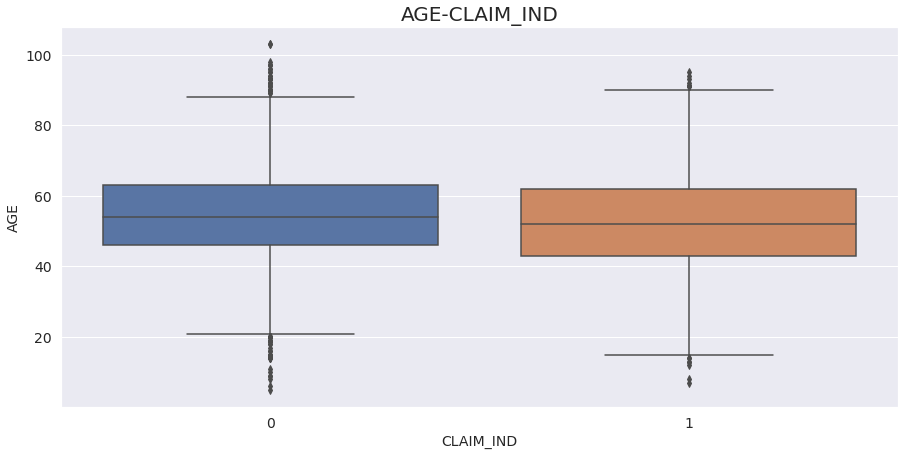

In [ ]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='CLAIM_IND', y='AGE', data=dataset)

plt.title('AGE-CLAIM_IND', fontsize=20)
plt.ylabel('AGE', fontsize=14)
plt.xlabel('CLAIM_IND', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Гипотеза 2: Зарплата у людей, которые обращаются за страховой выплатой, меньше.

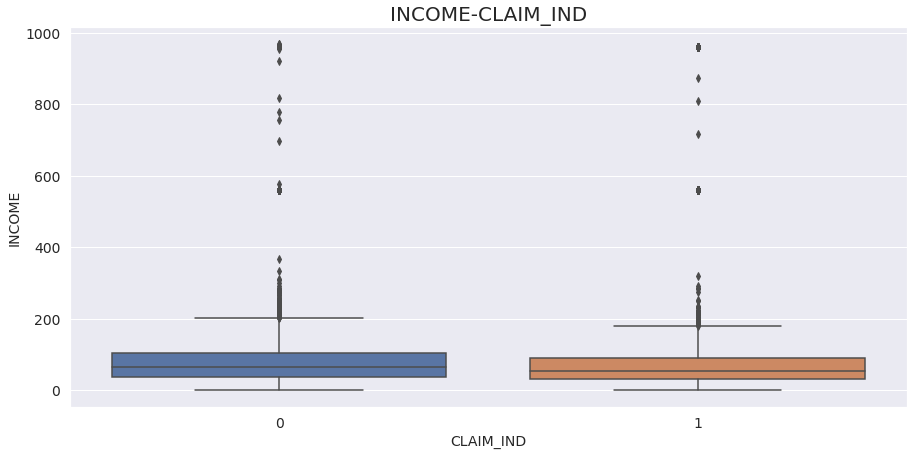

In [ ]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='CLAIM_IND', y='INCOME', data=dataset)

plt.title('INCOME-CLAIM_IND', fontsize=20)
plt.ylabel('INCOME', fontsize=14)
plt.xlabel('CLAIM_IND', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Гипотеза 3. Обращение по страховке зависит от уровня образования. У людей с невысшим образование больше шансов обратиться по страховки.

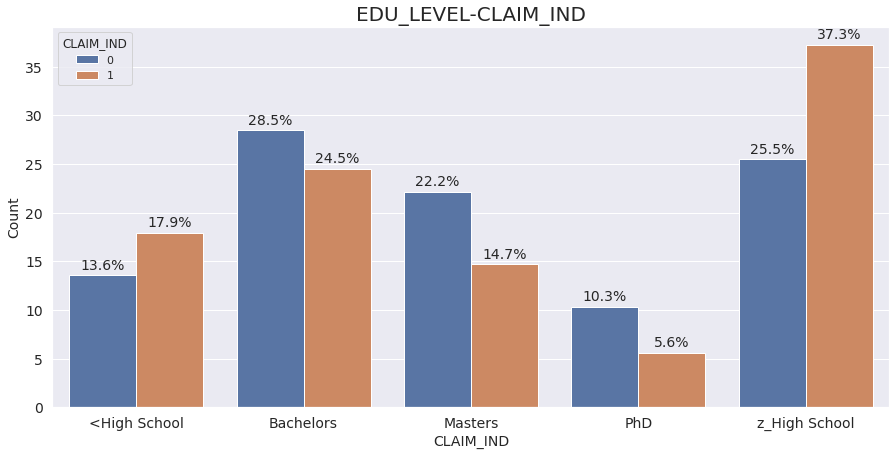

In [ ]:
plt.figure(figsize=(15, 7))

educ_def = (dataset.groupby(['CLAIM_IND'])['EDU_LEVEL']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('EDU_LEVEL'))

ax = sns.barplot(x="EDU_LEVEL", y="percentage", hue="CLAIM_IND", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('EDU_LEVEL-CLAIM_IND', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('CLAIM_IND', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Гипотеза 4: Стоимость машины у людей, которые обращаются за страховой выплатой, меньше.

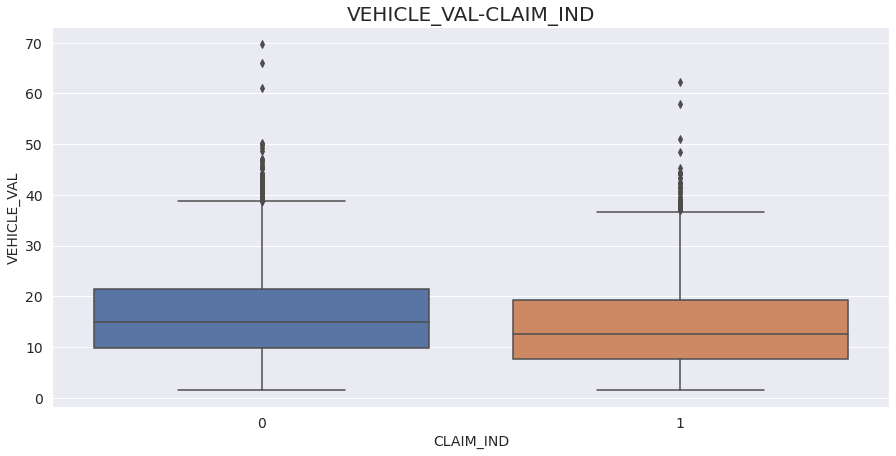

In [ ]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='CLAIM_IND', y='VEHICLE_VAL', data=dataset)

plt.title('VEHICLE_VAL-CLAIM_IND', fontsize=20)
plt.ylabel('VEHICLE_VAL', fontsize=14)
plt.xlabel('CLAIM_IND', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Гипотеза 5: У людей, которые используют машину для личных нужд, шанс обратиться по страховому случаю выше.

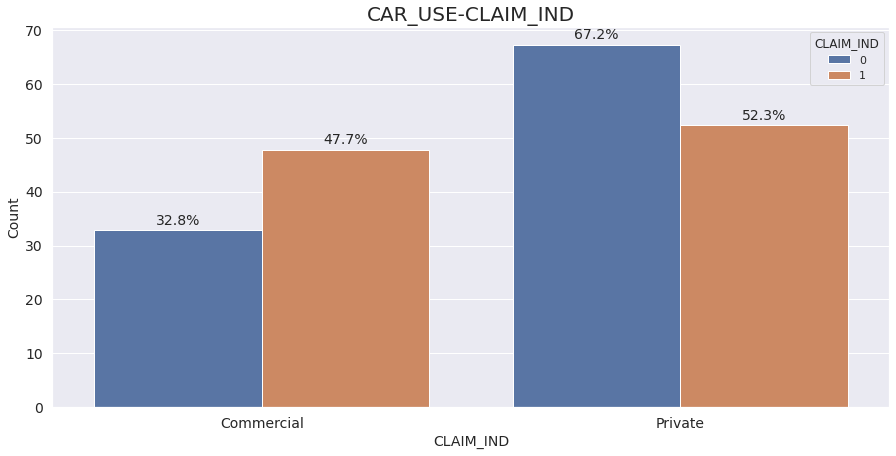

In [ ]:
plt.figure(figsize=(15, 7))

educ_def = (dataset.groupby(['CLAIM_IND'])['CAR_USE']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('CAR_USE'))

ax = sns.barplot(x="CAR_USE", y="percentage", hue="CLAIM_IND", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('CAR_USE-CLAIM_IND', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('CLAIM_IND', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Гипотеза 6: Люди, которые обращаются по страховому случаю, до этого обращались несколько раз за последнии 10 лет.

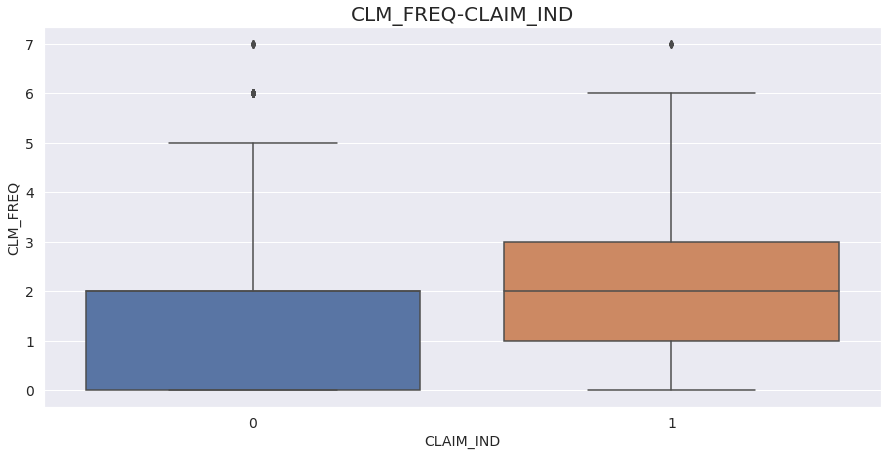

In [ ]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='CLAIM_IND', y='CLM_FREQ', data=dataset)

plt.title('CLM_FREQ-CLAIM_IND', fontsize=20)
plt.ylabel('CLM_FREQ', fontsize=14)
plt.xlabel('CLAIM_IND', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Гипотеза 7: Большая часть людей, которые обращаются по страховому случаю, живут в городах.

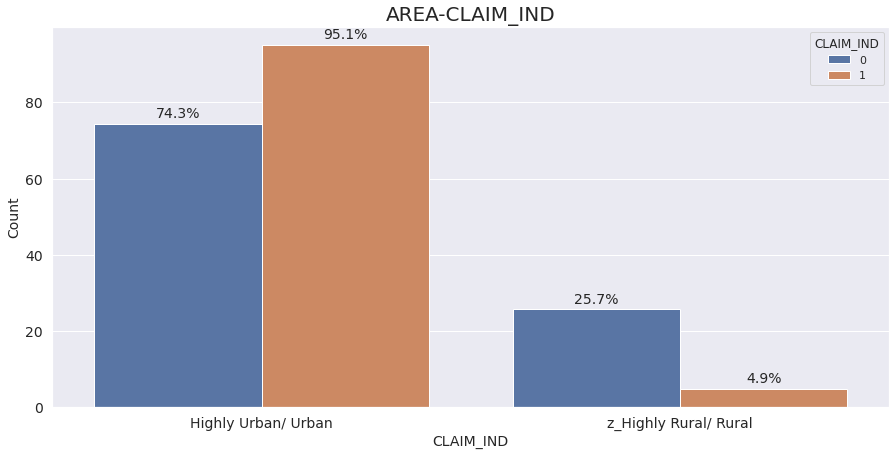

In [ ]:
plt.figure(figsize=(15, 7))

educ_def = (dataset.groupby(['CLAIM_IND'])['AREA']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('AREA'))

ax = sns.barplot(x="AREA", y="percentage", hue="CLAIM_IND", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('AREA-CLAIM_IND', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('CLAIM_IND', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Гипотеза 8: Дома людей, которые обращаются по страховому случаю, дешевле.  

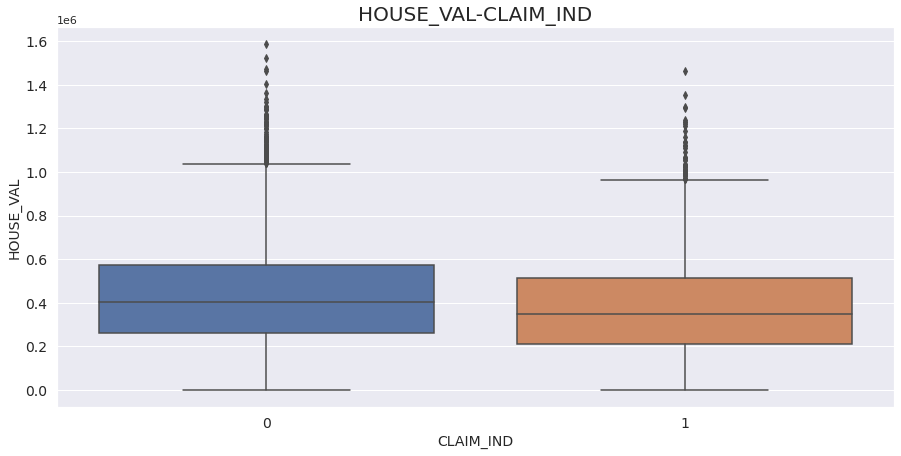

In [ ]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='CLAIM_IND', y='HOUSE_VAL', data=dataset)

plt.title('HOUSE_VAL-CLAIM_IND', fontsize=20)
plt.ylabel('HOUSE_VAL', fontsize=14)
plt.xlabel('CLAIM_IND', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Зависимость от суммы выплаты

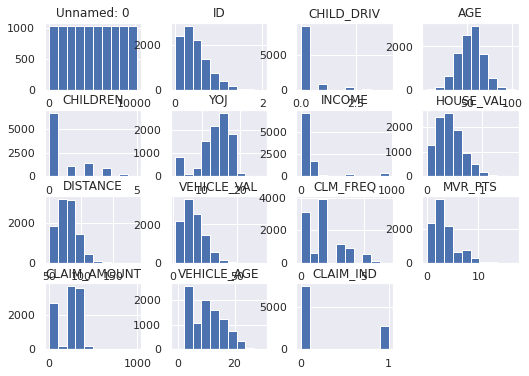

In [ ]:
dataset.hist();

Корреляция вещественных признаков

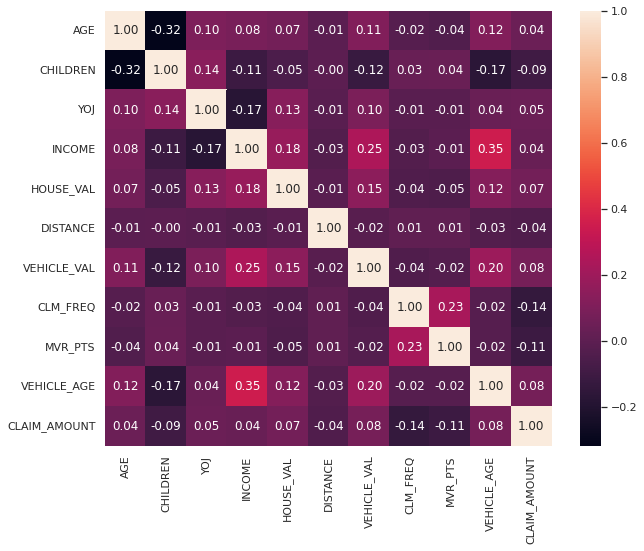

In [ ]:
num_cols = ['AGE', 'CHILDREN', 'YOJ', 'INCOME', 'HOUSE_VAL', 'DISTANCE',
            'VEHICLE_VAL', 'CLM_FREQ', 'MVR_PTS', 'VEHICLE_AGE', 'CLAIM_AMOUNT']

plt.figure(figsize=(10, 8))

sns.heatmap(dataset[num_cols].corr(method='spearman'), annot=True, fmt=".2f");

# Feature Engineering

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10300 non-null  int64  
 1   ID            10300 non-null  float64
 2   CHILD_DRIV    10300 non-null  int64  
 3   AGE           10293 non-null  float64
 4   CHILDREN      10300 non-null  int64  
 5   YOJ           9752 non-null   float64
 6   INCOME        9730 non-null   float64
 7   HOUSE_VAL     9725 non-null   float64
 8   STATUS        10298 non-null  object 
 9   GENDER        10300 non-null  object 
 10  EDU_LEVEL     10300 non-null  object 
 11  JOB           9635 non-null   object 
 12  DISTANCE      10300 non-null  int64  
 13  CAR_USE       10300 non-null  object 
 14  VEHICLE_VAL   10300 non-null  float64
 15  VEHICLE_TYPE  10300 non-null  object 
 16  CLM_FREQ      10300 non-null  int64  
 17  REVOKED       10300 non-null  object 
 18  MVR_PTS       10300 non-nu

Заполняем пропуски данных (вещестенные) медианой

In [ ]:
dataset.YOJ.fillna(dataset.YOJ.median(), inplace=True)
dataset.HOUSE_VAL.fillna(dataset.HOUSE_VAL.median(), inplace=True)
dataset.AGE.fillna(dataset.AGE.median(), inplace=True)
dataset.VEHICLE_AGE.fillna(dataset.VEHICLE_AGE.median(), inplace=True)
dataset.INCOME.fillna(dataset.INCOME.median(), inplace=True)

Заполняем пропуски данных (категориальные) модой

In [ ]:
dataset.STATUS.fillna(dataset.STATUS.mode()[0], inplace=True)
dataset.JOB.fillna(dataset.JOB.mode()[0], inplace=True)

Преобразование распределения логарифмированием

In [ ]:
dataset.INCOME = np.log(dataset.INCOME + 1)
dataset.HOUSE_VAL = np.log(dataset.HOUSE_VAL + 1)
dataset.CLAIM_AMOUNT = np.log(dataset.CLAIM_AMOUNT + 1)

In [ ]:
feats_cls = ['CHILD_DRIV', 'AGE', 'INCOME', 'JOB', 'EDU_LEVEL', 'VEHICLE_VAL', 'CAR_USE',
             'CLM_FREQ', 'AREA', 'HOUSE_VAL']

x_data = dataset[feats_cls]
t_data = dataset.CLAIM_IND

In [ ]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CHILD_DRIV   10300 non-null  int64  
 1   AGE          10300 non-null  float64
 2   INCOME       10300 non-null  float64
 3   JOB          10300 non-null  object 
 4   EDU_LEVEL    10300 non-null  object 
 5   VEHICLE_VAL  10300 non-null  float64
 6   CAR_USE      10300 non-null  object 
 7   CLM_FREQ     10300 non-null  int64  
 8   AREA         10300 non-null  object 
 9   HOUSE_VAL    10300 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 804.8+ KB


Категориальные в числовой вид, One-hot encoding 

In [ ]:
x_data.CAR_USE = x_data.CAR_USE.map({'Private': 1, 'Commercial': 0})

In [ ]:
x_data.AREA = x_data.AREA.map({'Highly Urban/ Urban': 1, 'z_Highly Rural/ Rural': 0})

In [ ]:
x_data = pd.concat([x_data,
                      pd.get_dummies(x_data.JOB, prefix="JOB"),
                      pd.get_dummies(x_data.EDU_LEVEL, prefix="EDU_LEVEL")],
                      axis=1)

In [ ]:
x_data.drop(columns=['JOB', 'EDU_LEVEL'], inplace=True)

In [ ]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CHILD_DRIV               10300 non-null  int64  
 1   AGE                      10300 non-null  float64
 2   INCOME                   10300 non-null  float64
 3   VEHICLE_VAL              10300 non-null  float64
 4   CAR_USE                  10300 non-null  int64  
 5   CLM_FREQ                 10300 non-null  int64  
 6   AREA                     10300 non-null  int64  
 7   HOUSE_VAL                10300 non-null  float64
 8   JOB_Banking              10300 non-null  uint8  
 9   JOB_Clerical             10300 non-null  uint8  
 10  JOB_Doctor               10300 non-null  uint8  
 11  JOB_Home Maker           10300 non-null  uint8  
 12  JOB_Manager              10300 non-null  uint8  
 13  JOB_None                 10300 non-null  uint8  
 14  JOB_Nurse             

# Modeling

## Classification Claim

### Logit baseline

In [ ]:
scaler = StandardScaler()
scaler.fit(x_data)
x_data_scl = scaler.transform(x_data)

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(
    x_data_scl, t_data, test_size=0.2, stratify=t_data, shuffle=True, random_state=5)

In [ ]:
logit = LogisticRegression(class_weight='balanced')
logit.fit(x_train, t_train)

t_pred = logit.predict(x_test)
t_score = logit.predict_proba(x_test)[:, 1]

In [ ]:
print('accuracy:', accuracy_score(t_test, t_pred))
print('roc-auc:', roc_auc_score(t_test, t_score))
print('precision:', precision_score(t_test, t_pred))
print('recall:', recall_score(t_test, t_pred))
print('f1:', f1_score(t_test, t_pred))

accuracy: 0.6796116504854369
roc-auc: 0.7601788463230782
precision: 0.4377104377104377
recall: 0.7103825136612022
f1: 0.5416666666666667


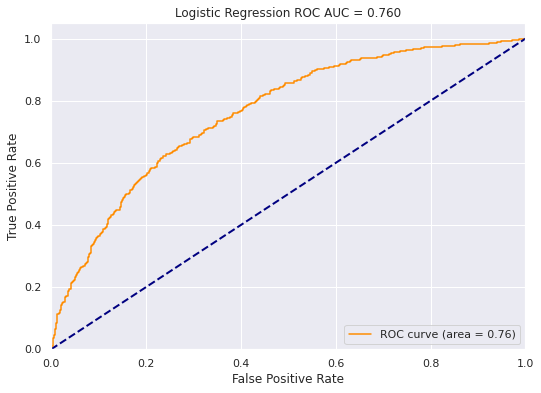

In [ ]:
fpr, tpr, thresholds = roc_curve(t_test, t_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

### Logit + CV

In [ ]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

logit_cv = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(logit_cv, parameters_grid,
                       scoring='roc_auc', cv=cv)

In [ ]:
%%time
grid_cv.fit(x_train, t_train)

In [ ]:
grid_cv.best_params_

{'C': 750.25, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
logit_cv = LogisticRegression(**grid_cv.best_params_, class_weight='balanced')
logit_cv.fit(x_train, t_train)

t_pred = logit_cv.predict(x_test)
t_score = logit_cv.predict_proba(x_test)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


In [ ]:
print('accuracy:', accuracy_score(t_test, t_pred))
print('roc-auc:', roc_auc_score(t_test, t_score))
print('precision:', precision_score(t_test, t_pred))
print('recall:', recall_score(t_test, t_pred))
print('f1:', f1_score(t_test, t_pred))

accuracy: 0.6796116504854369
roc-auc: 0.7601824627895735
precision: 0.4377104377104377
recall: 0.7103825136612022
f1: 0.5416666666666667


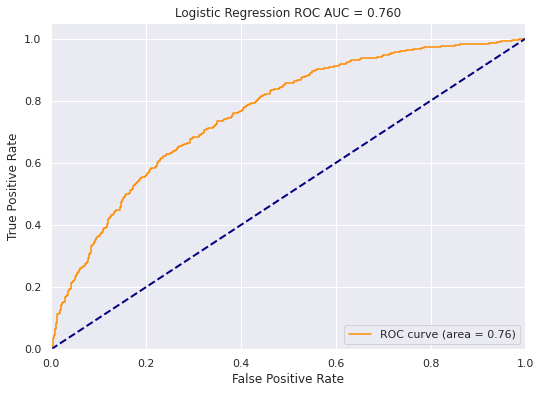

In [ ]:
fpr, tpr, thresholds = roc_curve(t_test, t_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

### RF + CV

In [122]:
x_train, x_test, t_train, t_test = train_test_split(
    x_data, t_data, test_size=0.2, stratify=t_data, shuffle=True, random_state=5)

In [ ]:
parameters_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': np.arange(50, 350, 50)
}

rf_cv = RandomForestClassifier(class_weight='balanced')
cv = StratifiedKFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(rf_cv, parameters_grid,
                       scoring='roc_auc', cv=cv)

In [ ]:
%%time
grid_cv.fit(x_train, t_train)

CPU times: user 9min 44s, sys: 478 ms, total: 9min 44s
Wall time: 9min 52s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300])},
             scoring='roc_auc')

In [ ]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [123]:
rf_cv = RandomForestClassifier(**grid_cv.best_params_, class_weight='balanced')
rf_cv.fit(x_train, t_train)

t_pred = rf_cv.predict(x_test)
t_score = rf_cv.predict_proba(x_test)[:,1]

In [124]:
print('accuracy:', accuracy_score(t_test, t_pred))
print('roc-auc:', roc_auc_score(t_test, t_score))
print('precision:', precision_score(t_test, t_pred))
print('recall:', recall_score(t_test, t_pred))
print('f1:', f1_score(t_test, t_pred))

accuracy: 0.6815533980582524
roc-auc: 0.7725887511015154
precision: 0.4400895856662934
recall: 0.7158469945355191
f1: 0.5450762829403607


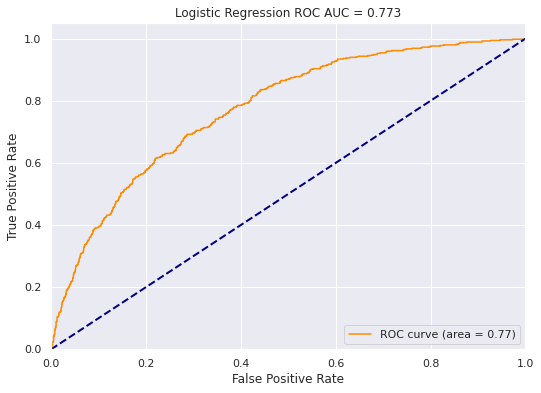

In [125]:
fpr, tpr, thresholds = roc_curve(t_test, t_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

#### Feature importances

Feature ranking:
1. AREA 0.334019 
2. CLM_FREQ 0.124784 
3. VEHICLE_VAL 0.078068 
4. CAR_USE 0.077345 
5. JOB_Manager 0.062983 
6. CHILD_DRIV 0.058297 
7. INCOME 0.054180 
8. EDU_LEVEL_z_High School 0.050609 
9. HOUSE_VAL 0.046829 
10. AGE 0.026450 
11. EDU_LEVEL_Masters 0.018275 
12. JOB_Teacher 0.014298 
13. JOB_Student 0.009958 
14. EDU_LEVEL_<High School 0.009338 
15. JOB_Nurse 0.008570 
16. EDU_LEVEL_PhD 0.007283 
17. JOB_Doctor 0.006419 
18. JOB_Clerical 0.005121 
19. JOB_Home Maker 0.003084 
20. EDU_LEVEL_Bachelors 0.002428 
21. JOB_Professional 0.001605 
22. JOB_None 0.000032 
23. JOB_Banking 0.000026 
24. JOB_Police 0.000000 


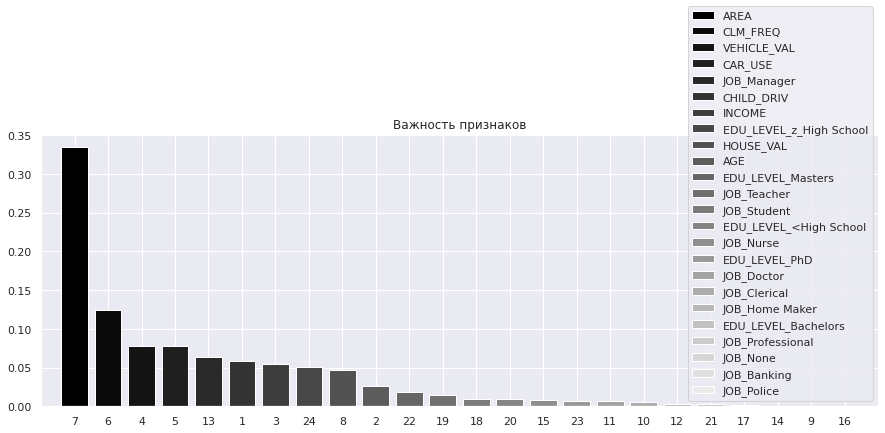

In [126]:
features = {}
for i in range(1, x_data.shape[1] + 1):
    features[f"f{i}"] = x_data.columns[i - 1]

importances = rf_cv.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = importances.shape[0]
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(
        "%d. %s %f "
        % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
    )
plt.figure(figsize=(15, 5))
plt.title(u"Важность признаков")
bars = plt.bar(
    range(num_to_plot),
    importances[indices[:num_to_plot]],
    color=([str(i / float(num_to_plot + 1)) for i in range(num_to_plot)]),
    align="center",
)
ticks = plt.xticks(range(num_to_plot), feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices]);

## Regression Claim

### Linear Regression

In [ ]:
x_data_reg = pd.concat([x_data, dataset[['MVR_PTS', 'VEHICLE_AGE']]], axis=1)
t_data_reg = dataset['CLAIM_AMOUNT']

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(
    x_data_reg, t_data_reg, test_size=0.2, shuffle=True, random_state=5)

In [114]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, t_train)

t_pred = linear_reg.predict(x_test)

In [115]:
print('MSE:', mean_squared_error(t_test, t_pred))

MSE: 2.621741651269622


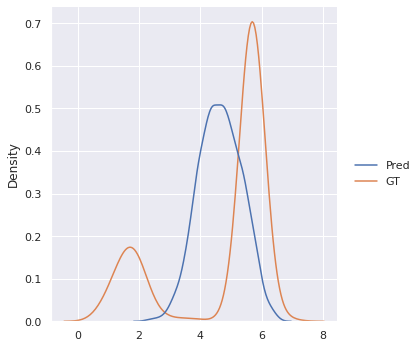

In [116]:
sns.displot(
    {
        "Pred": t_pred,
        "GT": t_test
    },
    kind="kde",
    common_norm=False);

#### Feature Importances

In [119]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = x_data_reg.columns
feature_imp['imp'] = linear_reg.coef_
feature_imp = feature_imp.sort_values(by='imp', ascending=False)

In [120]:
feature_imp

,feature,imp
12,JOB_Manager,4.937322e-01
4,CAR_USE,4.589577e-01
10,JOB_Doctor,3.076854e-01
22,EDU_LEVEL_PhD,2.139681e-01
21,EDU_LEVEL_Masters,1.803929e-01
13,JOB_None,1.077441e-01
7,HOUSE_VAL,8.875444e-02
20,EDU_LEVEL_Bachelors,6.507901e-02
14,JOB_Nurse,2.788816e-02
3,VEHICLE_VAL,2.052016e-02


### Ridge

In [ ]:
model_r = Ridge(alpha=1)
model_r.fit(x_train, t_train)

t_pred = model_r.predict(x_test)

In [ ]:
print('MSE:', mean_squared_error(t_test, t_pred))

MSE: 2.6216961966143457


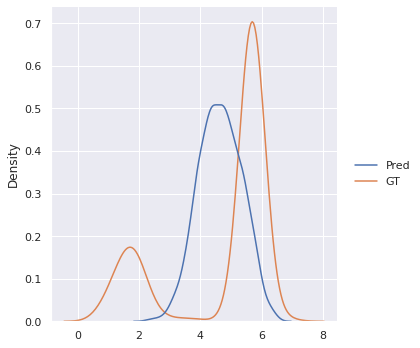

In [ ]:
sns.displot(
    {
        "Pred": t_pred,
        "GT": t_test
    },
    kind="kde",
    common_norm=False);

SVR

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(
    x_data_reg, t_data_reg, test_size=0.2, shuffle=True, random_state=5)

In [ ]:
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

In [ ]:
svr_model = SVR(kernel='linear', degree=3, C=100, epsilon=0.1)
svr_model.fit(x_train, t_train)

t_pred = svr_model.predict(x_test)

In [ ]:
print('MSE:', mean_squared_error(t_test, t_pred))

MSE: 2.888086539366816


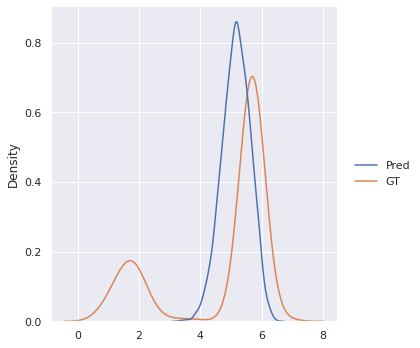

In [ ]:
sns.displot(
    {
        "Pred": t_pred,
        "GT": t_test
    },
    kind="kde",
    common_norm=False);

### RF + CV

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(
    x_data_reg, t_data_reg, test_size=0.2, shuffle=True, random_state=5)

In [ ]:
np.arange(50, 350, 50)

array([ 50, 100, 150, 200, 250, 300])

In [ ]:
parameters_grid = {
    'criterion': ['squared_error'],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': np.arange(50, 250, 50)
}

rf_cv = RandomForestRegressor()
cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=1)
grid_cv = RandomizedSearchCV(rf_cv, parameters_grid,
                       scoring='neg_mean_absolute_error', cv=cv, verbose=1)

In [ ]:
%%time
grid_cv.fit(x_train, t_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 33.9 s, sys: 72 ms, total: 33.9 s
Wall time: 33.9 s


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=3, random_state=1),
                   estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': array([ 50, 100, 150, 200])},
                   scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_cv.best_params_

{'criterion': 'squared_error', 'max_depth': 6, 'n_estimators': 100}

In [ ]:
rf_cv = RandomForestRegressor(**grid_cv.best_params_)
rf_cv.fit(x_train, t_train)

t_pred = rf_cv.predict(x_test)

In [ ]:
print('MSE:', mean_squared_error(t_test, t_pred))

MSE: 2.5799369678799637


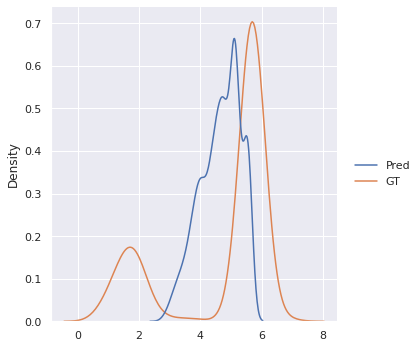

In [ ]:
sns.displot(
    {
        "Pred": t_pred,
        "GT": t_test
    },
    kind="kde",
    common_norm=False);

#### Feature importances

Feature ranking:
1. AREA 0.224785 
2. VEHICLE_VAL 0.121159 
3. EDU_LEVEL_z_High School 0.114482 
4. CHILD_DRIV 0.081825 
5. MVR_PTS 0.070224 
6. CAR_USE 0.069974 
7. EDU_LEVEL_<High School 0.057347 
8. CLM_FREQ 0.054318 
9. HOUSE_VAL 0.054125 
10. INCOME 0.043443 
11. JOB_Manager 0.036170 
12. AGE 0.035450 
13. VEHICLE_AGE 0.020583 
14. JOB_Student 0.003997 
15. JOB_Clerical 0.002500 
16. JOB_Professional 0.002480 
17. EDU_LEVEL_Masters 0.001954 
18. JOB_Home Maker 0.001761 
19. JOB_Teacher 0.001395 
20. EDU_LEVEL_Bachelors 0.000895 
21. JOB_Nurse 0.000834 
22. EDU_LEVEL_PhD 0.000301 
23. JOB_None 0.000000 
24. JOB_Police 0.000000 
25. JOB_Doctor 0.000000 
26. JOB_Banking 0.000000 


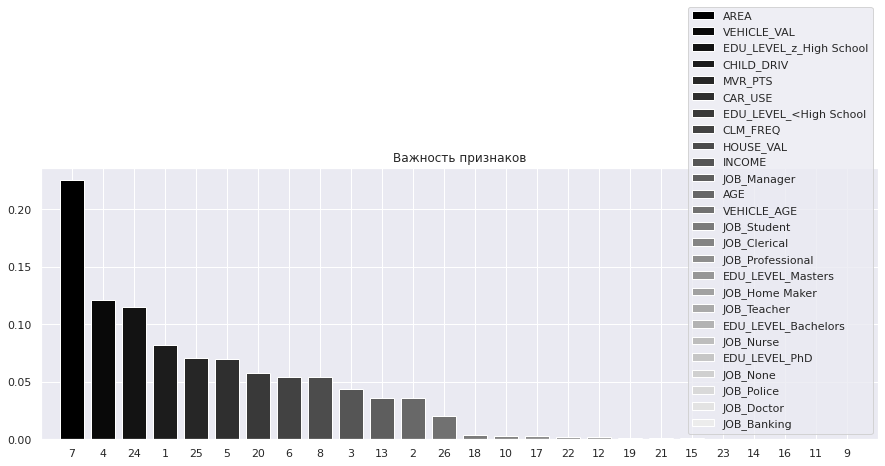

In [111]:
features = {}
for i in range(1, x_data_reg.shape[1] + 1):
    features[f"f{i}"] = x_data_reg.columns[i - 1]

importances = rf_cv.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = importances.shape[0]
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(
        "%d. %s %f "
        % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
    )
plt.figure(figsize=(15, 5))
plt.title(u"Важность признаков")
bars = plt.bar(
    range(num_to_plot),
    importances[indices[:num_to_plot]],
    color=([str(i / float(num_to_plot + 1)) for i in range(num_to_plot)]),
    align="center",
)
ticks = plt.xticks(range(num_to_plot), feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices]);